# **This project for maven pizza price prediction**


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
pip install ydata_profiling

In [ ]:
import ydata_profiling

In [ ]:
# upload the data
from google.colab import files
uploaded = files.upload()

Saving pizzaplace.csv to pizzaplace.csv


In [ ]:
df=pd.read_csv('pizzaplace.csv')
df

,Unnamed: 0,id,date,time,name,size,type,price
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


**Data preprocessing by droping unnecessary columns and rename unnamed column**

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [ ]:
df

,id,date,time,name,size,type,price
0,1,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...
49569,49570,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [ ]:
import pandas_profiling

**Data profile report by pandas_profiling**

In [ ]:
from pandas_profiling import ProfileReport
# Create a report with a customized configuration
profile = ProfileReport(df)
profile

<ipython-input-12-82c3c8267240>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49574 non-null  int64  
 1   date    49574 non-null  object 
 2   time    49574 non-null  object 
 3   name    49574 non-null  object 
 4   size    49574 non-null  object 
 5   type    49574 non-null  object 
 6   price   49574 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.6+ MB


**converting date and time columns to datetime and extracting some columns**

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['day_name']=df['date'].dt.day_name()

In [ ]:
df['time'] = pd.to_datetime(df['time']).dt.strftime('%H:%M')

In [ ]:
df['time']=pd.to_datetime(df['time'])

In [ ]:
df

,id,date,time,name,size,type,price,day_name
0,1,2015-01-01,2023-07-04 11:38:00,hawaiian,M,classic,13.25,Thursday
1,2,2015-01-01,2023-07-04 11:57:00,classic_dlx,M,classic,16.00,Thursday
2,3,2015-01-01,2023-07-04 11:57:00,mexicana,M,veggie,16.00,Thursday
3,4,2015-01-01,2023-07-04 11:57:00,thai_ckn,L,chicken,20.75,Thursday
4,5,2015-01-01,2023-07-04 11:57:00,five_cheese,L,veggie,18.50,Thursday
...,...,...,...,...,...,...,...,...
49569,49570,2015-12-31,2023-07-04 21:23:00,four_cheese,L,veggie,17.95,Thursday
49570,49571,2015-12-31,2023-07-04 21:23:00,napolitana,S,classic,12.00,Thursday
49571,49572,2015-12-31,2023-07-04 21:23:00,ckn_alfredo,M,chicken,16.75,Thursday
49572,49573,2015-12-31,2023-07-04 22:09:00,mexicana,L,veggie,20.25,Thursday


In [ ]:
# Save the modified DataFrame to a new CSV file
df.to_csv('PIZZA_DATA.csv', index=False)

**extracting  hour & day and month columns**

In [ ]:
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [ ]:
df['hour']=df['time'].dt.hour

In [ ]:
df.drop('time',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        49574 non-null  int64         
 1   date      49574 non-null  datetime64[ns]
 2   name      49574 non-null  object        
 3   size      49574 non-null  object        
 4   type      49574 non-null  object        
 5   price     49574 non-null  float64       
 6   day_name  49574 non-null  object        
 7   month     49574 non-null  int64         
 8   day       49574 non-null  int64         
 9   hour      49574 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 3.8+ MB


In [ ]:
df.head()

,id,date,name,size,type,price,day_name,month,day,hour
0,1,2015-01-01,hawaiian,M,classic,13.25,Thursday,1,1,11
1,2,2015-01-01,classic_dlx,M,classic,16.00,Thursday,1,1,11
2,3,2015-01-01,mexicana,M,veggie,16.00,Thursday,1,1,11
3,4,2015-01-01,thai_ckn,L,chicken,20.75,Thursday,1,1,11
4,5,2015-01-01,five_cheese,L,veggie,18.50,Thursday,1,1,11


In [ ]:
df['type'].value_counts()

classic    14888
supreme    11987
veggie     11649
chicken    11050
Name: type, dtype: int64

**visualizing count of size column and type**

<Axes: xlabel='size', ylabel='count'>

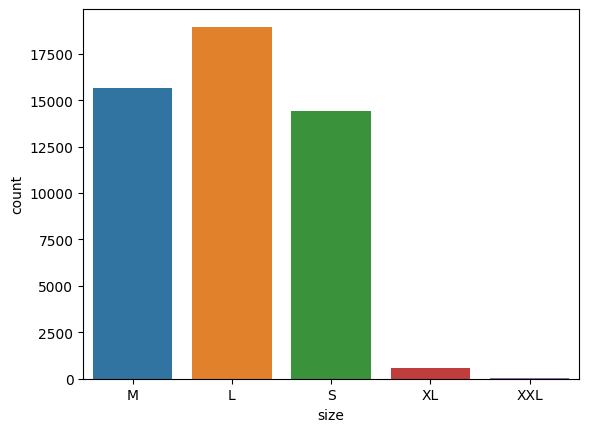

In [ ]:
sns.countplot(df,x='size')

<Axes: xlabel='type', ylabel='count'>

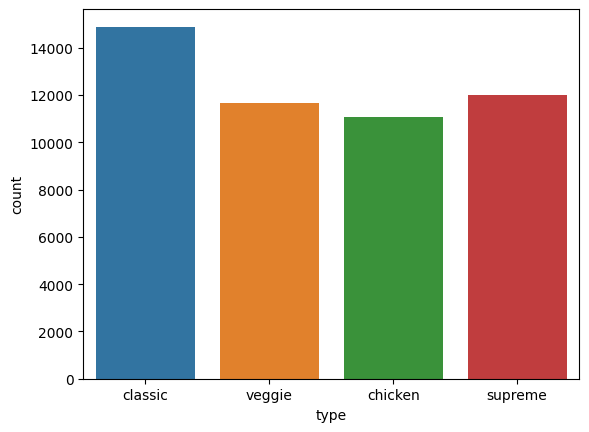

In [ ]:
sns.countplot(df,x='type')

**visualizing count of name and day_name columns**

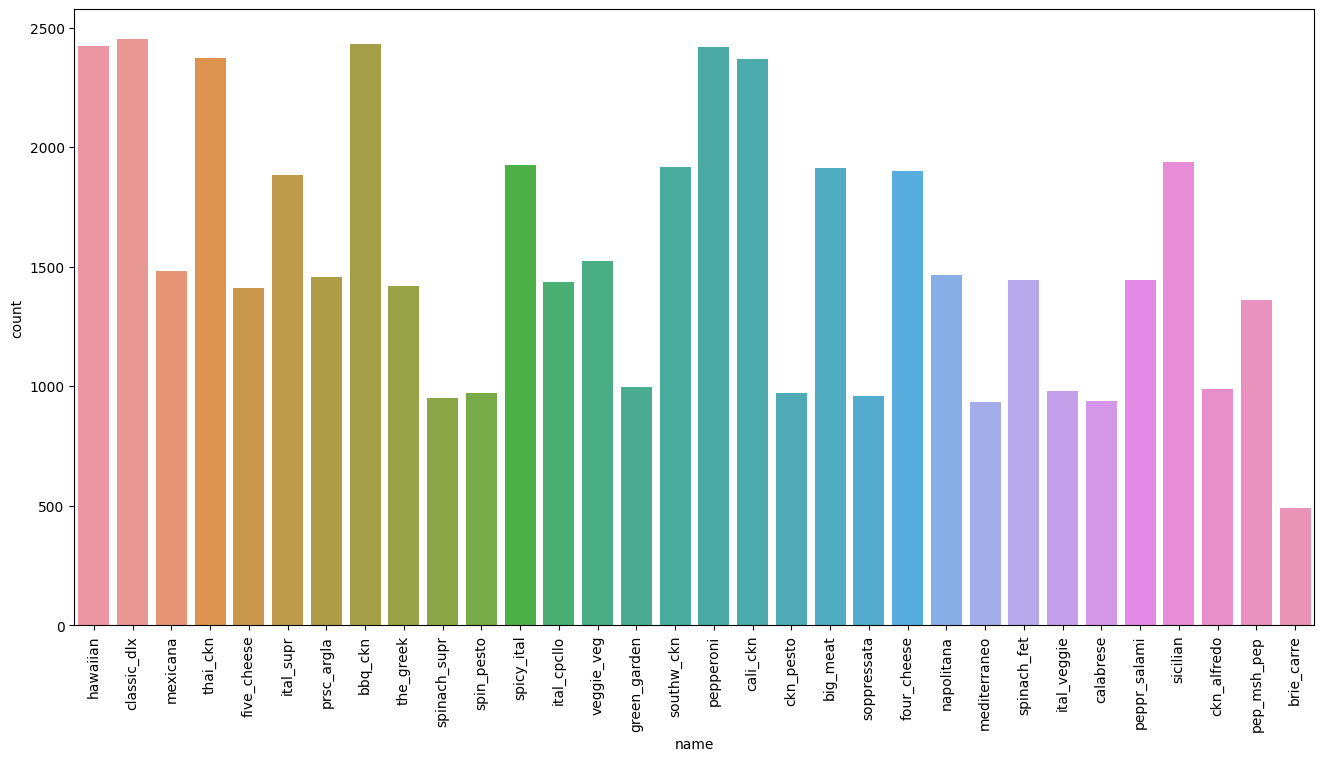

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(df,x='name')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='day_name', ylabel='count'>

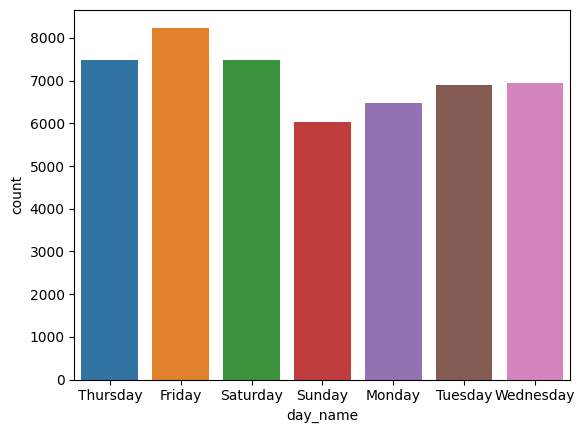

In [ ]:
sns.countplot(df,x='day_name')

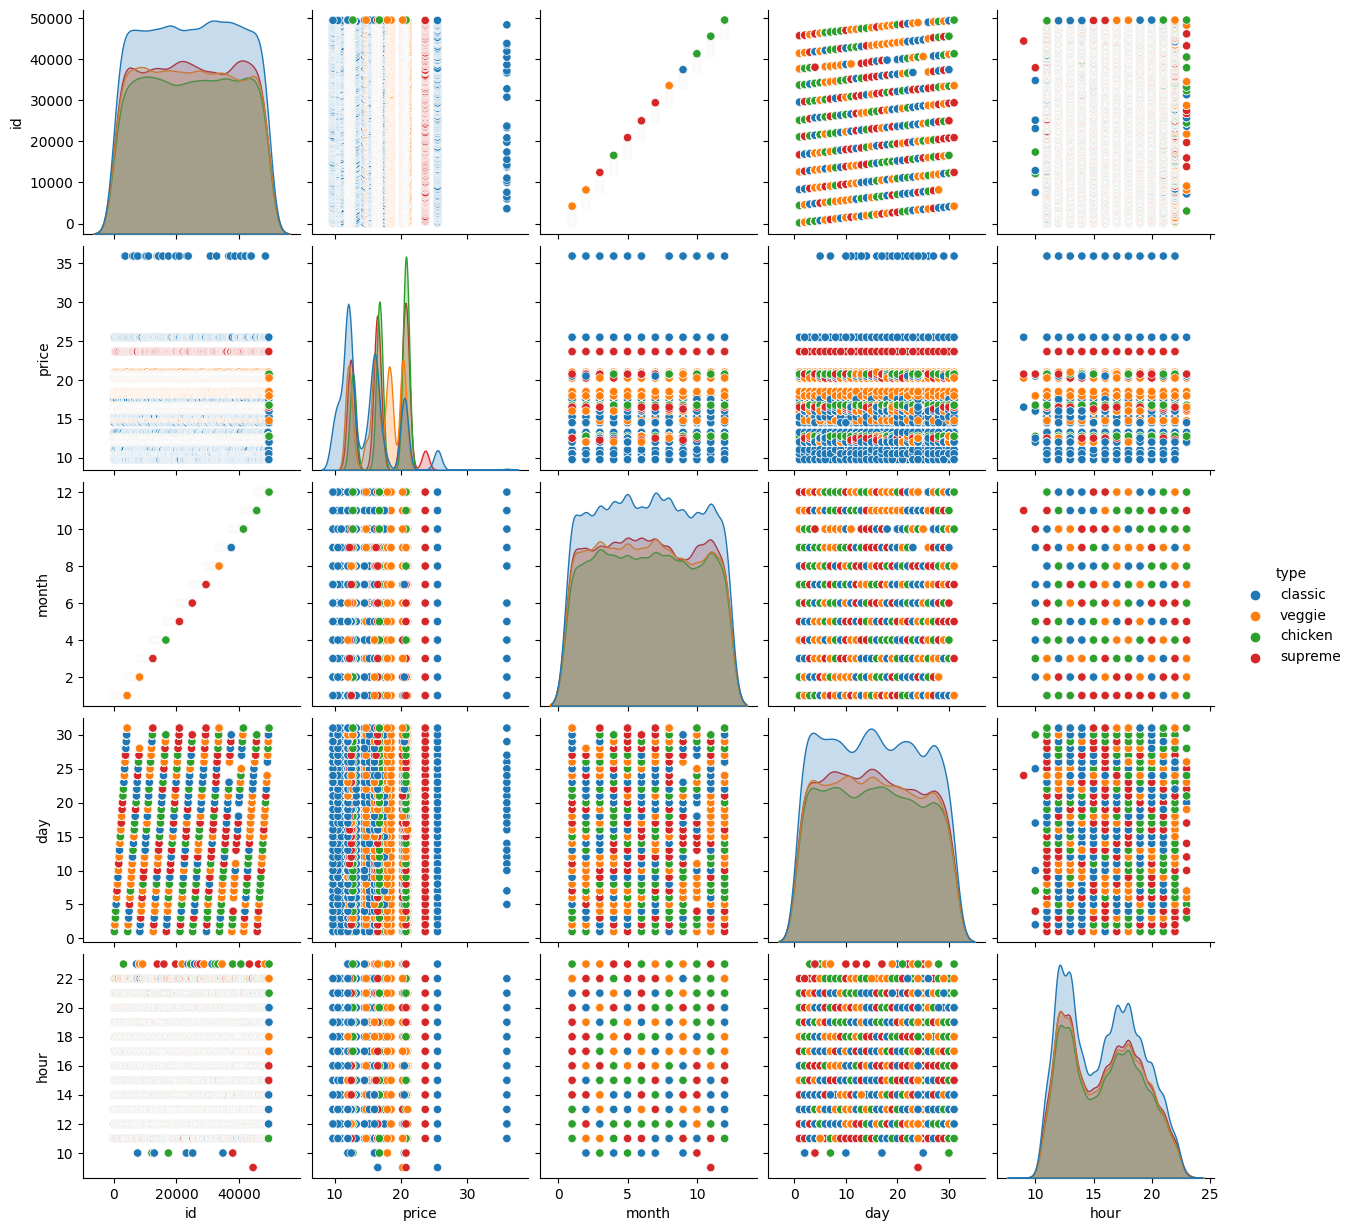

In [ ]:
sns.pairplot(df,hue='type')

**Data correlation**

In [ ]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,month,day,hour
id,1.000000,-0.003349,0.996449,0.087843,0.006110
price,-0.003349,1.000000,-0.003483,0.001782,-0.001038
month,0.996449,-0.003483,1.000000,0.004653,0.002488
day,0.087843,0.001782,0.004653,1.000000,0.007886
hour,0.006110,-0.001038,0.002488,0.007886,1.000000


<ipython-input-32-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

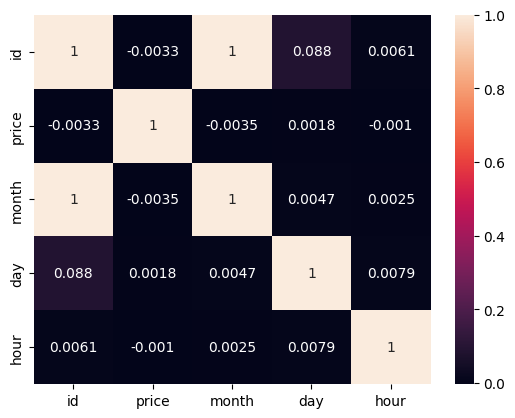

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.head()

,id,date,name,size,type,price,day_name,month,day,hour
0,1,2015-01-01,hawaiian,M,classic,13.25,Thursday,1,1,11
1,2,2015-01-01,classic_dlx,M,classic,16.00,Thursday,1,1,11
2,3,2015-01-01,mexicana,M,veggie,16.00,Thursday,1,1,11
3,4,2015-01-01,thai_ckn,L,chicken,20.75,Thursday,1,1,11
4,5,2015-01-01,five_cheese,L,veggie,18.50,Thursday,1,1,11


In [ ]:
df.drop(['id','day_name','date'],axis=1,inplace=True)

**converting categorical columns to numerical**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'name', 'size', and 'type' columns
df['name'] = le.fit_transform(df['name'])
df['size'] = le.fit_transform(df['size'])
df['type'] = le.fit_transform(df['type'])

In [ ]:
X=df.drop('price',axis=1)
y=df['price']

**Split the data to train and test **

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [ ]:
X_train.shape

(37180, 6)

In [ ]:
X_test.shape

(12394, 6)

**Using random forest regressor to train the data and predict the output**

In [ ]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
RFR=RandomForestRegressor(n_estimators=200,max_depth=5)
RFR.fit(X_train,y_train)
y_pred=RFR.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.6386726975592807


In [ ]:
y_pred[:10]

array([16.21293148, 12.14721941, 12.38332695, 16.21293148, 17.85177915,
       20.75      , 12.14721941, 16.75      , 20.49271662, 25.5       ])

In [ ]:
y_test[:10]

41617    16.25
30118    12.00
33420    12.75
147      16.50
31924    18.50
47067    20.75
27095    12.75
5865     16.75
22567    20.25
37490    25.50
Name: price, dtype: float64

**Comparing between predicted and actual data and visualizing the results to see the accuracy**

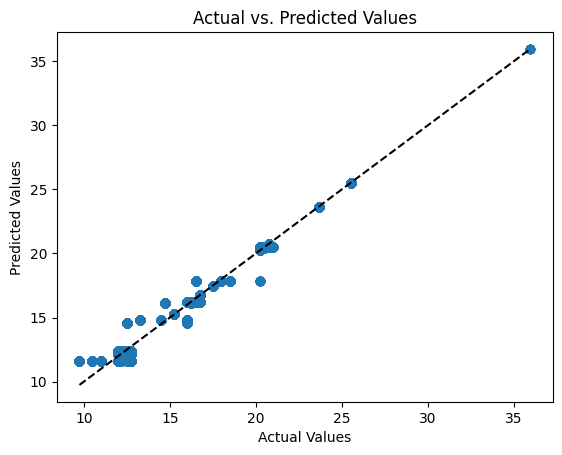

In [ ]:
# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

# Show the plot
plt.show()

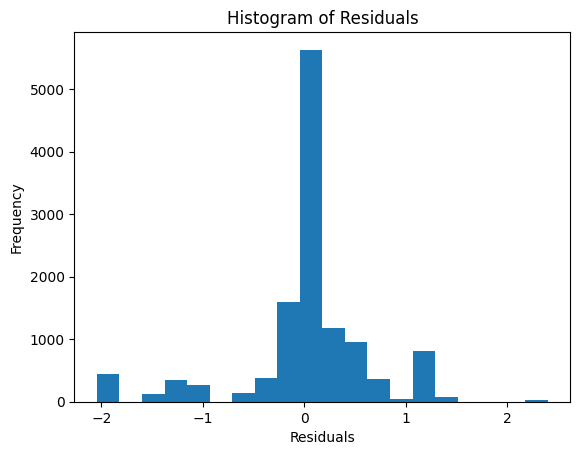

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot a histogram of the residuals
plt.hist(residuals, bins=20)

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Show the plot
plt.show()

# **as we see the accuracy is very good and the differences between actual and predicted and the residuals values is very low**